In [112]:
#Standard libraries for data analysis:
    
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import norm, skew
from scipy import stats
import statsmodels.api as sm
import seaborn as sns
# sklearn modules for data preprocessing:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

#sklearn modules for Model Selection:
from sklearn import svm, tree, linear_model, neighbors
from sklearn import naive_bayes, ensemble, discriminant_analysis, gaussian_process
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import uniform
from sklearn import linear_model, datasets
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
#sklearn modules for Model Evaluation & Improvement:
    
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
#Standard libraries for data visualization:
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix
from sklearn.metrics import roc_curve
#Miscellaneous Utilitiy Libraries:
    
import random
import os
import re
import sys
import timeit
import string
import time
from datetime import datetime
from time import time
from dateutil.parser import parse
import joblib

In [113]:
os.getcwd()

'C:\\Users\\oscar\\Downloads'

In [114]:
os.chdir('C:\\Users\\oscar\Downloads')

In [115]:
dataset = pd.read_excel('dataset_alternative_processed.xlsx.xlsx')

In [116]:
y = dataset['Churn Value']

X = dataset.drop(['Churn Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

In [117]:
from imblearn.under_sampling import RandomUnderSampler

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train, y_train)

print(f'''Shape of X before SMOTE: {X.shape}
Shape of X after SMOTE: {X_train.shape}''')

print('\nBalance of positive and negative classes (%):')
y_train.value_counts(normalize=True) * 100

Shape of X before SMOTE: (7043, 31)
Shape of X after SMOTE: (2990, 31)

Balance of positive and negative classes (%):


1    50.0
0    50.0
Name: Churn Value, dtype: float64

## Logistic Regression

### Feature Selection

Optimal number of features : 20


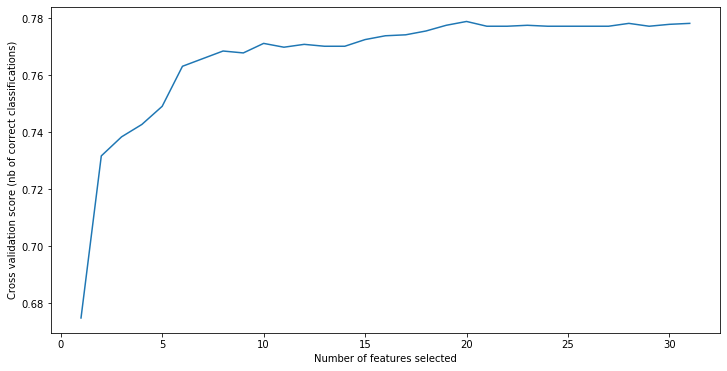

In [118]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RepeatedStratifiedKFold

rfecv = RFECV(estimator= LogisticRegression(max_iter=300))



pipeline = Pipeline([('Feature Selection', rfecv), ('Model', LogisticRegression(max_iter=200))])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=36851234)
n_scores = cross_val_score(pipeline, X_train, y_train, scoring='f1', cv=cv, n_jobs=-1)
np.mean(n_scores)

pipeline.fit(X_train,y_train)

print("Optimal number of features : %d" % rfecv.n_features_)

    
rfecv.support_
rfecv_df = pd.DataFrame(rfecv.ranking_,index=X.columns,columns=["Rank"]).sort_values(by="Rank",ascending=True)
rfecv_df.head()

import matplotlib.pyplot as plt
plt.figure(figsize=(12,6))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [119]:
rfecv_df

,Rank
Tenure Months,1
Contract_One year,1
Payment Method_Electronic check,1
Streaming TV_Yes,1
Tech Support_Yes,1
Tech Support_No internet service,1
Device Protection_No internet service,1
Online Backup_Yes,1
Contract_Two year,1
Online Security_Yes,1


## Recreate Dataset with the optimal features

In [121]:
dataset = pd.read_excel('dataset_alternative_processed.xlsx.xlsx')

In [122]:
dataset.drop(['Multiple Lines_Yes','Streaming TV_No internet service','Device Protection_Yes','Streaming Movies_Yes','Streaming Movies_No internet service','Senior Citizen_1','Monthly Charges','CLTV','Payment Method_Mailed check','Gender_1','Payment Method_Credit card (automatic)'],axis=1, inplace=True)

In [123]:
y = dataset['Churn Value']

X = dataset.drop(['Churn Value'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1234)

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train, y_train = undersample.fit_resample(X_train, y_train)

### Hyperparameters

In [184]:

multi_class=['auto', 'ovr', 'multinomial']
penalty= ['none','l1', 'l2', 'elasticnet']

# Create regularization hyperparameter space
C = [100, 10, 1.0, 0.1, 0.01]

solver=['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']


# Combine Parameters
parameters = dict(C=C, penalty=penalty, solver=solver, multi_class = multi_class)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

lr_classifier = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = parameters,
                           scoring = "f1",
                           cv = 10,
                           n_jobs = -1,
                            error_score=0)
lr_classifier.fit(X_train, y_train)

lr_classifier.best_params_

C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


{'C': 100, 'multi_class': 'auto', 'penalty': 'none', 'solver': 'sag'}

## Final Model

ROC AUC: 0.7886434679273554
f1_score: 0.6535677352637022
accuracy: 0.7622427253371186
precision: 0.5328836424957841
recall: 0.8449197860962567
[[758 277]
 [ 58 316]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1035
           1       0.53      0.84      0.65       374

    accuracy                           0.76      1409
   macro avg       0.73      0.79      0.74      1409
weighted avg       0.82      0.76      0.78      1409



C:\Users\oscar\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1323: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


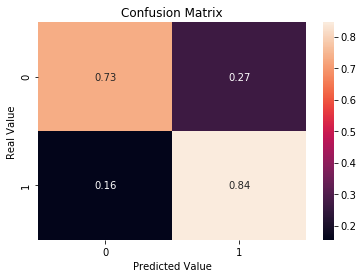

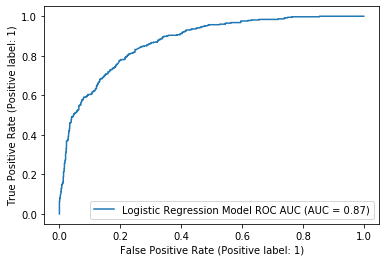

In [185]:
log_model = LogisticRegression(C=100, multi_class='auto', penalty='none', solver='sag')
log_model.fit(X_train, y_train)
log_pred =  log_model.predict(X_test)

log_roc_auc_score_default = roc_auc_score(y_test, log_pred)
log_accuracy_default = accuracy_score(y_test, log_pred)

print("ROC AUC:",roc_auc_score(y_test, log_pred))
print("f1_score:",f1_score(y_test, log_pred))
print("accuracy:",metrics.accuracy_score(y_test, log_pred))
print("precision:",metrics.precision_score(y_test, log_pred))
print("recall:",metrics.recall_score(y_test, log_pred))

print(confusion_matrix(y_test, log_pred))
# classification report
print(classification_report(y_test, log_pred))

# confusion matrix
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, log_pred, normalize='true'), annot=True, ax=ax)
ax.set_title('Confusion Matrix')
ax.set_ylabel('Real Value')
ax.set_xlabel('Predicted Value')

plt.show()

#Visualization ROC Curve

plot_roc_curve(log_model ,
               X_test,
               y_test,
               name='Logistic Regression Model ROC AUC');


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
